In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
import plotly.express as px
import plotly.offline as pyo

In [4]:
df=pd.read_csv("C:/Users/LENOVO/Downloads/UberDataset.csv")

In [5]:
df.shape

(1156, 7)

In [6]:
df.head(5)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [7]:
df.tail(5)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [8]:
type(df)

pandas.core.frame.DataFrame

In [9]:
df.CATEGORY.nunique()

2

In [10]:
print(df.dtypes)

START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object


In [11]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce')

# Now, check the data types of 'START_DATE' and 'END_DATE' columns
print("Data type of 'START_DATE':",df['START_DATE'].dtype)
print("Data type of 'END_DATE':",df['END_DATE'].dtype)

Data type of 'START_DATE': datetime64[ns]
Data type of 'END_DATE': datetime64[ns]


# Data Cleaning

In [12]:
drop_columns = df.columns.drop('PURPOSE')
df.dropna(subset=drop_columns, inplace=True)
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1043,2016-12-12 13:22:00,2016-12-12 13:32:00,Business,Cary,Cary,3.1,Errand/Supplies
1044,2016-12-12 13:36:00,2016-12-12 13:51:00,Business,Cary,Apex,4.4,Meal/Entertain
1045,2016-12-12 14:26:00,2016-12-12 14:39:00,Business,Apex,Cary,4.7,Customer Visit
1046,2016-12-12 17:51:00,2016-12-12 18:01:00,Business,Cary,Morrisville,3.0,Meal/Entertain


In [13]:
df.isnull().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       159
dtype: int64

In [14]:
df['START'] = df['START'].replace("Kar?chi", "Karachi")
df['STOP'] = df['STOP'].replace("Kar?chi", "Karachi")

# Exploratory Data Analysis

In [16]:
df.CATEGORY.unique()

array(['Business', 'Personal'], dtype=object)

In [17]:
df.PURPOSE.unique()

array(['Meal/Entertain', nan, 'Errand/Supplies', 'Meeting',
       'Customer Visit', 'Temporary Site', 'Between Offices'],
      dtype=object)

In [18]:
average_distance_travelled = df.groupby('PURPOSE')['MILES'].mean()
average_distance_travelled

PURPOSE
Between Offices    10.933333
Customer Visit     18.639130
Errand/Supplies     4.121277
Meal/Entertain      4.912500
Meeting            13.822222
Temporary Site      7.757143
Name: MILES, dtype: float64

## Comparison with the average distance travelled by passengers

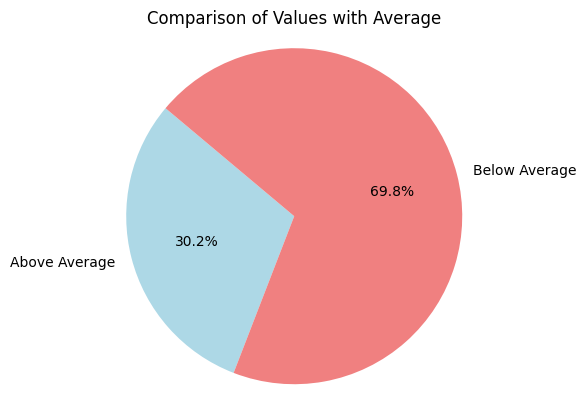

In [19]:
average_value = df['MILES'].mean()

# Compare values with the average and categorize them
above_average = df[df['MILES'] > average_value].shape[0]
below_average = df[df['MILES'] <= average_value].shape[0]

# Data for the pie chart
sizes = [above_average, below_average]
labels = ['Above Average', 'Below Average']
colors = ['lightblue', 'lightcoral']

# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 

plt.title('Comparison of Values with Average')
plt.show()

## Average miles travelled for different purposes

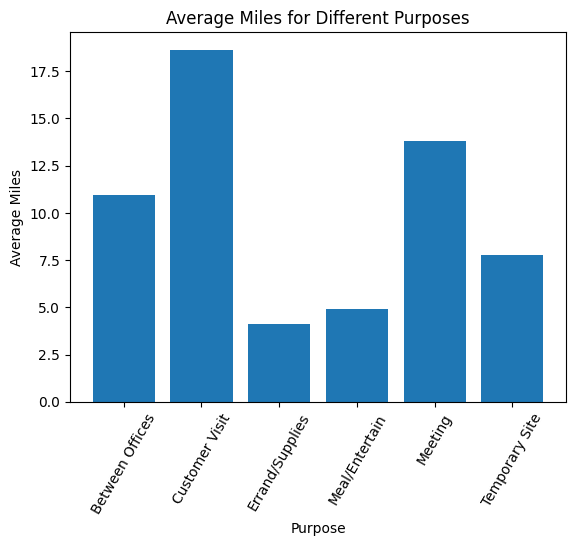

In [22]:
plt.bar(average_distance_travelled.index, average_distance_travelled.values)
plt.xlabel('Purpose')
plt.ylabel('Average Miles')
plt.title('Average Miles for Different Purposes')
plt.xticks(rotation=60)
plt.show()

## Type of Passengers Category Wise

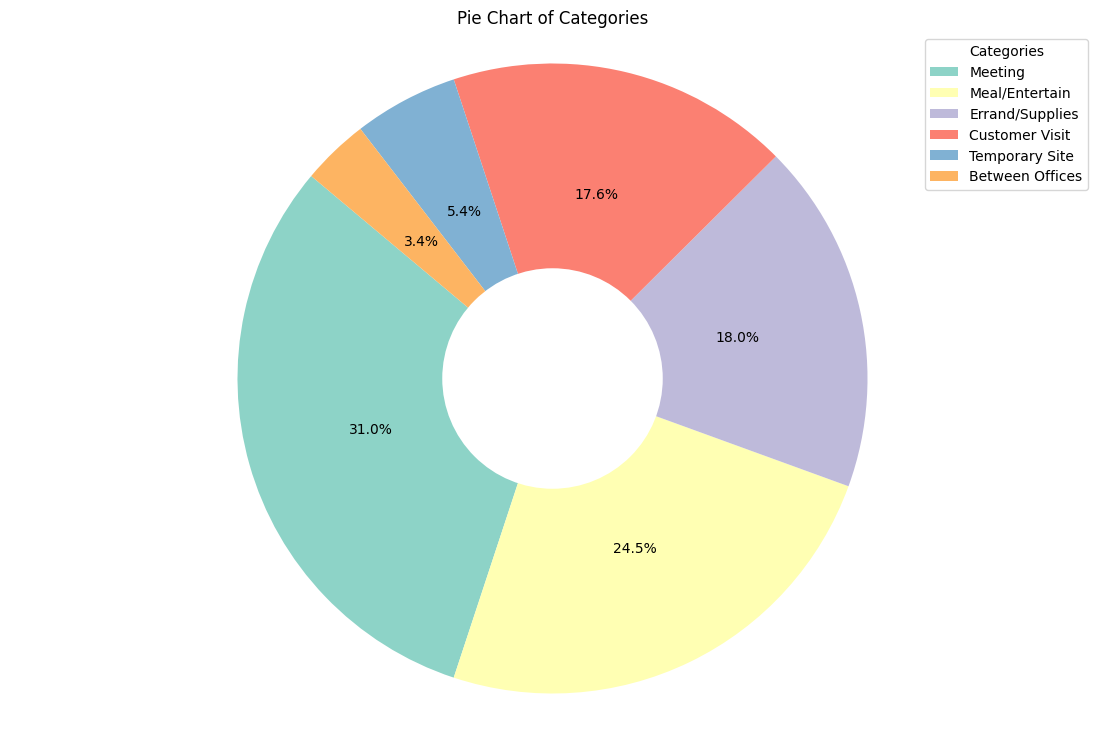

In [23]:
# Count the occurrences of each category
category_counts = df['PURPOSE'].value_counts()

# Data for the pie chart
sizes = category_counts.values
labels = category_counts.index
colors = plt.cm.Set3.colors  # Choose a colormap

# Create a pie chart
plt.figure(figsize=(14,9))
plt.pie(sizes, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Adding white circle in the center to make it look like a donut chart (optional)
centre_circle = plt.Circle((0,0),0.35,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.legend(labels, title='Categories', loc='best')
plt.title('Pie Chart of Categories')
plt.show()

In [24]:
purpose=df['PURPOSE'].value_counts()
purpose

PURPOSE
Meeting            81
Meal/Entertain     64
Errand/Supplies    47
Customer Visit     46
Temporary Site     14
Between Offices     9
Name: count, dtype: int64

In [27]:
average_miles_by_category = df.groupby('CATEGORY')['MILES'].mean()
average_miles_by_category

CATEGORY
Business    9.273219
Personal    3.153846
Name: MILES, dtype: float64

In [28]:
least_5_start_stations = df['START'].value_counts().nsmallest(5)
least_5_start_stations

START
Washington          1
Farmington Woods    1
San Jose            1
Wake Forest         1
Eastgate            1
Name: count, dtype: int64

In [29]:
least_5_stop_stations = df['STOP'].value_counts().nsmallest(5)
least_5_stop_stations

STOP
Southwest Berkeley     1
Potrero Flats          1
College Avenue         1
St Thomas              1
Pontchartrain Beach    1
Name: count, dtype: int64

## Performance of top start and stop stations

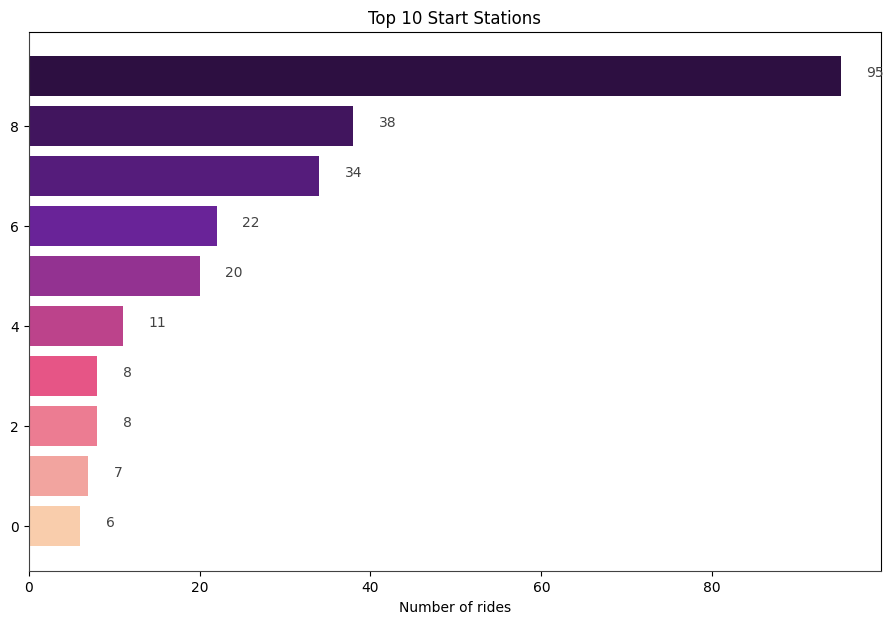

In [30]:
top10_startstations = df["START"].value_counts()[:10].sort_values(ascending=True)

height = top10_startstations.values
bars = top10_startstations.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=[11,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible("#424242")
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

colors = ["#f9cdac","#f2a49f","#ec7c92","#e65586","#bc438b","#933291","#692398","#551c7b","#41155e","#2d0f41"]
plt.barh(y_pos, height, color=colors)
 
plt.xlabel("Number of rides")

for i, v in enumerate(height):
    ax.text(v+3, i, str(v), color='#424242')
plt.title("Top 10 Start Stations")


plt.show()

In [31]:
top10_startstations

START
Kissimmee            6
Berkeley             7
Westpark Place       8
Apex                 8
Raleigh             11
Durham              20
Unknown Location    22
Whitebridge         34
Morrisville         38
Cary                95
Name: count, dtype: int64

In [32]:
top10_stopstations = df["START"].value_counts()[:10].sort_values(ascending=True)
top10_stopstations

START
Kissimmee            6
Berkeley             7
Westpark Place       8
Apex                 8
Raleigh             11
Durham              20
Unknown Location    22
Whitebridge         34
Morrisville         38
Cary                95
Name: count, dtype: int64

## Ride Durations

In [33]:
# calculating ride durations by subtracting start time by end time
df['ride_duration'] = df['END_DATE'] - df['START_DATE']

# Calculating min, max, and average ride durations
min_duration = df['ride_duration'].min()
max_duration = df['ride_duration'].max()
average_duration = df['ride_duration'].mean()

print("Minimum ride duration:", min_duration)
print("Maximum ride duration:", max_duration)
print("Average ride duration:", average_duration)

Minimum ride duration: 0 days 00:00:00
Maximum ride duration: 0 days 02:58:00
Average ride duration: 0 days 00:19:19.571428571


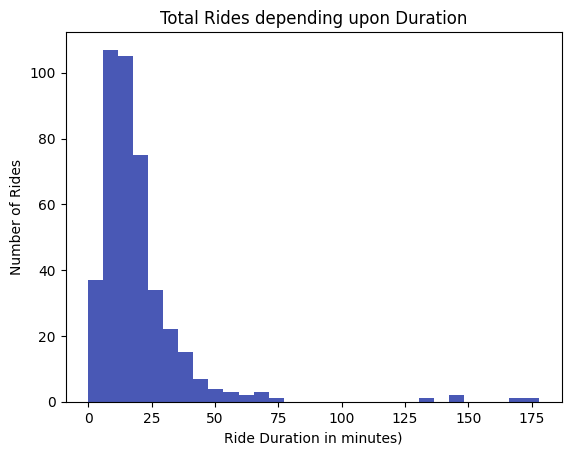

In [34]:
plt.hist(df['ride_duration'].dt.total_seconds() / 60, bins=30 , color= '#4958B5') 
plt.xlabel('Ride Duration in minutes)')
plt.ylabel('Number of Rides')
plt.title('Total Rides depending upon Duration')
plt.show()